# Week4授業前課題1 アヤメの分類
Week3で使用したirisデータセットを使い、分類問題を解く練習をします。<br>
<br>
4種類の特徴量（説明変数）からアヤメの種類を推測する問題が設定できます。アヤメの種類を**分類**するので、こういったものを分類問題と呼びます。<br>

<br>

#### 今回使う手法の一覧
scikit-laernを使い以下の手法で学習と推定を行っていきます。それぞれの手法についての詳細は今の段階では扱いません。ライブラリを使えばどれも気軽に利用できることや、手法毎の結果に違いがあることを簡単に見ていきます。<br>
- 最近傍法
- ロジスティック回帰
- SVM
- 決定木
- ランダムフォレスト

まず、最近傍法を例に分類問題を解く基本的な流れを紹介します。課題の後半ではこれを参考に他の手法にも適用してもらいます。<br>
<br>
この流れについては後々より深く学び、実践していきます。今回の課題では大まかな流れの把握を行ってください。<br>

<br>

##### 練習のための準備
練習する上で結果の可視化を行いたいため、特徴量は4つの中で2つだけを使うことにします。こうすることで2次元の散布図を描き確認することができます。また、問題を単純化するためアヤメの種類を2つだけ使うことにします。分類対象が2種類の場合を**2値分類**と呼び、それ以上の**多値分類**とは区別をします。それぞれで手法や評価方法が変わります。今回はまずより基本的な2値分類を行います。

## 【問題1】練習のために特徴量とカテゴリを選択
選び方は合計18通りありますが、以下の組み合わせで練習することにします。irisデータセットをWeek3同様に取得した後、データフレームからこれらを抜き出してください。<br>

<br>

- `virgicolor`と`virginica`
- `sepal_length`と`petal_length`<br>

<br>

**《実際の問題では？》**<br>
<br>
実際の問題を解く上でも結果の可視化は有効です。しかし、そのために学習や推定に使う特徴量を2つに絞るのは望ましくありません。そのため学習や推定は多次元で行い、可視化をする際にだけ主成分分析などの特徴抽出手法を適用するといったことが行われます。また、Week3で利用した散布図行列を使い可視化することも可能です。

In [1]:
# データセット取得
from sklearn.datasets import load_iris

iris = load_iris()

print('loading completed')

loading completed


In [2]:
# データをDataFrame型として保存
import pandas as pd

x = pd.DataFrame(data=iris.data, columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])
y = pd.DataFrame(data=iris.target, columns=['Species'])

iris_df = pd.concat([x, y], axis=1)

# DataFrameから使用する特徴量とサンプルを抽出
iris_data = iris_df.loc[iris_df['Species'] !=0, ['sepal_length', 'petal_length', 'Species']]

iris_data

,sepal_length,petal_length,Species
50,7.0,4.7,1
51,6.4,4.5,1
52,6.9,4.9,1
53,5.5,4.0,1
54,6.5,4.6,1
...,...,...,...
145,6.7,5.2,2
146,6.3,5.0,2
147,6.5,5.2,2
148,6.2,5.4,2


## 【問題2】データの分析
まずはデータの分析を行いますが、これはWeek3の課題1で行いました。その際出力した散布図行列を見ることで、先ほどの18通りそれぞれの散布図も確認できます。sepal_lengthとpetal_lengthを使い、virgicolorとvirginicaを分類するのは少し難しそうな状況であることが分かるはずです。<br>
<br>
ここでは復習を兼ねて、抜き出したデータの散布図と箱ひげ図（boxplot）、バイオリン図（violinplot）を表示してください。<br>

<br>

**《実際の問題では？》**<br>

<br>

このデータ分析の結果を元に前処理として特徴量エンジニアリングを行っていきます。<br>
<br>
今回はsepal_lengthとpetal_lengthを抜き出しましたが、分析した上で、問題を少々難しくするための前処理をしたと言えます。

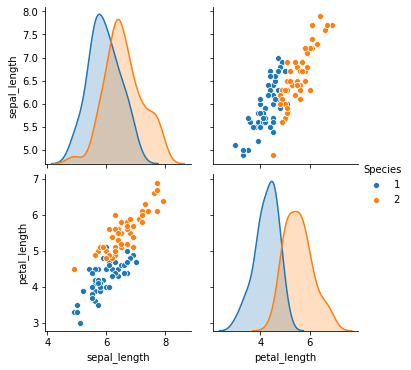

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# 散布図行列を出力
sns.pairplot(iris_data, hue='Species')
plt.show()

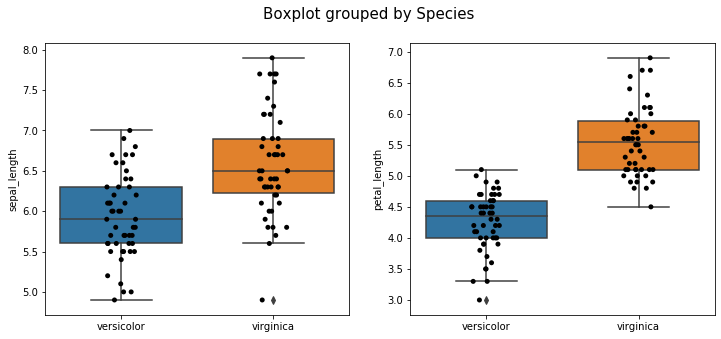

In [4]:
# 箱ひげ図を出力
plt.figure(figsize = (12,5))

plt.suptitle("Boxplot grouped by Species", fontsize=15)
iris_labels = ["versicolor", "virginica"]

for i, source in enumerate(['sepal_length', 'petal_length']):
    
    plt.subplot(1, 2, i + 1)
    sns.boxplot(y=source, x= 'Species', data=iris_data)
    sns.stripplot(y=source, x='Species', data=iris_data,
                  jitter=True, color='black')
    
    plt.xticks([0, 1], ["versicolor", "virginica"])
    plt.xlabel(None)

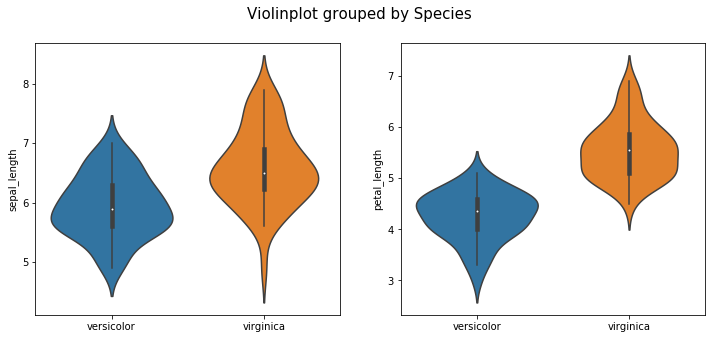

In [5]:
# バイオリン図を出力
plt.figure(figsize = (12,5))

plt.suptitle("Violinplot grouped by Species", fontsize=15)
iris_labels = ["versicolor", "virginica"]

for i, source in enumerate(['sepal_length', 'petal_length']):
    
    plt.subplot(1, 2, i + 1)
    sns.violinplot(y=source, x= 'Species', data=iris_data)
    
    plt.xticks([0, 1], ["versicolor", "virginica"])
    plt.xlabel(None)

## 【問題3】前処理・訓練データと検証データの分割
前処理の一貫として、訓練データと検証データの分割を行います。今回は訓練データ75%、検証データ25%として分割してください。<br>

<br>

scikit-learnの`train_test_split`が利用できます。公式ドキュメントのExamplesを参考に動かしてください。<br>
<br>
[sklearn.model_selection.train_test_split — scikit-learn 0.22.2 documentation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)<br>

<br>

**《注意点》**<br>
<br>
データの分析まではPandasのDataFrameを使用してきました。しかし、scikit-learnはNumPyのndarrayを想定して作られています。そのため、この段階でndarrayへの変換を行いましょう。特徴量（説明変数）をX、正解（目的変数）をyというndarrayに格納します。<br>

<br>

**《分割する理由》**<br>
<br>
分類問題の目的は未知のデータを正しく分類することです。その目的が達成できているかを確認するため、実際には答えの分かっているデータの一部を学習には使わず残しておきます。この学習に使用していないデータで推定を行い、そこから求めた指標値によって検証します。学習に使うデータを訓練データ、検証に使うデータが検証データで、一般的に7対3から8対2程度の割合にします。

In [3]:
import numpy as np
from sklearn.model_selection import train_test_split

# DataFrameをndarrayに変換
X = np.array(iris_data.iloc[:, :-1])
y = np.array(iris_data.iloc[:, -1])

print(X.shape)
print(y.shape)

(100, 2)
(100,)


In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

print(X_train.shape)
print(y_train.shape)

(75, 2)
(75,)


## 【問題4】前処理・標準化
分類精度をあげるための加工を行います。手法ごとに適切な方法は異なりますが、ここでは一例として**標準化**を行うことにします。<br>
<br>
標準化を行うライブラリもscikit-learnに用意されています。これを使って標準化してください。<br>

<br>

[sklearn.preprocessing.StandardScaler — scikit-learn 0.22.2 documentation](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)<br>

<br>

**《注意点》**<br>
<br>
標準化は訓練用のデータで`fit`を行い、訓練用、検証用双方のデータに`transform`を行います。検証データは学習の段階には存在しない未知のデータの代わりなので、標準化のための平均や標準偏差の計算に使ってはいけません。<br>

<br>

**《実際の問題での前処理は？》**<br>
<br>
アヤメのデータセットのように綺麗で扱いやすい状況で提供されることはまずありません。分析を行いながら、様々な加工が必要になってきます。例えばWeek3の課題2で行った欠損値の確認の後、場合により欠損値の補完も行います。外れ値の確認や、複数のデータセットの整理などもあります。

In [22]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

## 【問題5】学習と推定
最近傍法（k-nearest neighbors, k-nn）で学習を行います。scikit-learnの公式ドキュメントのExamplesを参考に、k-nnの学習を行ってください。ここで入力するのは訓練データです。<br>

<br>

[sklearn.neighbors.KNeighborsClassifier — scikit-learn 0.22.2 documentation](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier)<br>

<br>

学習が終わった後、検証データを`predict`メソッドに入力し、推定を行ってください。<br>
<br>
パラメータが複数ありますが、今はそれらの理解を重視しません。最も基本的な要素として、`n_neighbors`の数があるため、これは複数試してみましょう。デフォルトの5、および1と3を最低限行ってください。5の場合を`5-nn`、3の場合を`3-nn`のように呼びます。

In [9]:
# 様々な値をn_neighborsに代入し、モデルの正解率を検証

from sklearn.neighbors import KNeighborsClassifier

nn_list = [1, 3, 5, 10, 30, 50, 75]

for nn in nn_list:
    neigh = KNeighborsClassifier(n_neighbors=nn)
    neigh.fit(X_train_std, y_train)

    result = neigh.predict(X_test_std)

    print("正解ラベル：\n{}".format(y_test))
    print("予測ラベル：\n{}".format(result))
    print("パラメータ{}-nnの正解率：{:.1%}".format(nn, neigh.score(X_test_std, y_test)))
    print("-------------------")

正解ラベル：
[1 2 1 1 2 2 2 2 1 1 1 1 2 1 2 2 1 2 2 2 1 2 2 1 1]
予測ラベル：
[2 2 1 1 2 2 2 2 1 2 1 1 2 1 2 2 1 1 2 2 1 2 2 1 1]
パラメータ1-nnの正解率：88.0%
-------------------
正解ラベル：
[1 2 1 1 2 2 2 2 1 1 1 1 2 1 2 2 1 2 2 2 1 2 2 1 1]
予測ラベル：
[1 2 1 1 2 2 2 1 1 1 1 1 2 1 2 2 1 2 2 2 1 2 2 1 1]
パラメータ3-nnの正解率：96.0%
-------------------
正解ラベル：
[1 2 1 1 2 2 2 2 1 1 1 1 2 1 2 2 1 2 2 2 1 2 2 1 1]
予測ラベル：
[1 2 1 1 2 2 2 1 1 2 1 1 2 1 2 2 1 2 2 2 1 2 2 1 1]
パラメータ5-nnの正解率：92.0%
-------------------
正解ラベル：
[1 2 1 1 2 2 2 2 1 1 1 1 2 1 2 2 1 2 2 2 1 2 2 1 1]
予測ラベル：
[1 2 1 1 2 2 2 1 1 1 1 1 2 1 2 2 1 2 2 2 1 2 2 1 1]
パラメータ10-nnの正解率：96.0%
-------------------
正解ラベル：
[1 2 1 1 2 2 2 2 1 1 1 1 2 1 2 2 1 2 2 2 1 2 2 1 1]
予測ラベル：
[1 2 1 1 2 1 2 1 1 1 1 1 2 1 2 2 1 2 2 2 1 2 2 1 1]
パラメータ30-nnの正解率：92.0%
-------------------
正解ラベル：
[1 2 1 1 2 2 2 2 1 1 1 1 2 1 2 2 1 2 2 2 1 2 2 1 1]
予測ラベル：
[1 2 1 1 2 1 2 1 2 1 1 1 2 1 2 2 1 1 2 2 1 2 2 2 1]
パラメータ50-nnの正解率：80.0%
-------------------
正解ラベル：
[1 2 1 1 2 2 2 2 1 1 1 1 2 1 2 2 1 2 2 2 1

>n_neighborsの値が上がるにつれ、正解率が下がる。また、n_neighborsの最大値はtrainサンプル数である(max = 75)。

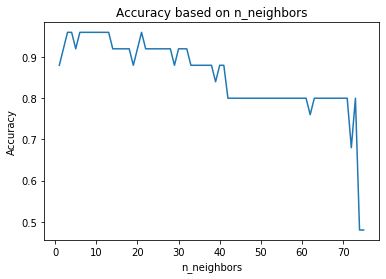

In [10]:
# nnによる正解率の推移を描画

%matplotlib inline

x_plot = []
y_plot = []

for nn in range(1, 76):
    neigh = KNeighborsClassifier(n_neighbors=nn)
    neigh.fit(X_train_std, y_train)
    
    x_plot.append(nn)
    y_plot.append(neigh.score(X_test_std, y_test))

fig = plt.figure()

plt.plot(x_plot, y_plot)
plt.title("Accuracy based on n_neighbors")
plt.xlabel("n_neighbors")
plt.ylabel("Accuracy")

plt.show()


## 【問題6】評価
検証データの特徴量を入力して得られた推定値と、検証データの正解値の近さを計算し、学習したモデルを評価します。<br>

<br>

2値分類を評価するための指標値には**Accuracy（正解率）**、**Precision（適合率）**、**Recall（再現率）**、**F値** があります。それぞれの意味を理解するには、**混同行列（confusion matrix）**を見ることになります。<br>
<br>
- scikit-learnを使い4種類の指標を計算する
- 混同行列をscikit-learnを使い表示する
- 4種類の指標値の意味について簡単に調査して文章でまとめる

In [11]:
# デフォルトnn値（＝５）に対して、上記指標を計算

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

neigh = KNeighborsClassifier()
neigh.fit(X_train_std, y_train)

y_pred = neigh.predict(X_test_std)

print("正解率：{:.2f}".format(accuracy_score(y_test, y_pred)))
print("適合率：{:.2f}".format(precision_score(y_test, y_pred)))
print("再現率：{:.2f}".format(recall_score(y_test, y_pred)))
print("F1値：{:.2f}".format(f1_score(y_test, y_pred)))

正解率：0.92
適合率：0.92
再現率：0.92
F1値：0.92


In [12]:
# 混合行列を出力

from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred)

array([[11,  1],
       [ 1, 12]])

>**指標値の解説**
>- 正解率：全てのサンプルのうち、正解したサンプルの割合
>- 適合率：陽性と予測されたサンプルのうち、正解したサンプルの割合
>- 再現率：実際に陽性のサンプルのうち、正解したサンプルの割合
>- F1値：適合率と再現率の調和平均

## 【問題7】可視化
評価の一貫として可視化を行います。今回の場合2次元の特徴量で分類を行いましたから、散布図で可視化が可能です。以下にどう分割するかという**決定領域**を描く関数を用意しました。これを利用して可視化を行ってください。Xとyには訓練データまたは検証データを与えます。

In [45]:
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
def decision_region(X, y, model, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel', target_names=['versicolor', 'virginica']):
    """
    2値分類を2次元の特徴量で学習したモデルの決定領域を描く。
    背景の色が学習したモデルによる推定値から描画される。
    散布図の点は訓練データまたは検証データである。

    Parameters
    ----------------
    X : ndarray, shape(n_samples, 2)
        特徴量
    y : ndarray, shape(n_samples,)
        ラベル
    model : object
        学習したモデルのインスンタスを入れる
    step : float, (default : 0.1)
        推定値を計算する間隔を設定する
    title : str
        グラフのタイトルの文章を与える
    xlabel, ylabel : str
        軸ラベルの文章を与える
    target_names= : list of str
        凡例の一覧を与える
    """
    # setting
    scatter_color = ['red', 'blue', 'darkgreen']
    contourf_color = ['pink', 'skyblue', 'lightgreen']
    n_class = 3
    # pred
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)
    # plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(set(y)):
        plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker='o')
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()

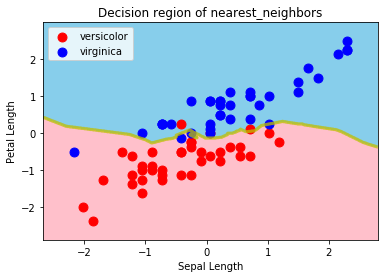

In [14]:
 decision_region(X_train_std, y_train, neigh, title="Decision region of nearest_neighbors",
                 xlabel='Sepal Length', ylabel='Petal Length')

## 【問題8】他の手法の学習
以下の全ての手法について学習・推定・評価・可視化を行ってください。そして、指標値を１つの表にまとめてください。その表と決定領域を利用して結果を簡単に考察してください。どの手法がどの指標値で良かったかや、どういった決定領域になっていたかを述べてください。<br>
<br>
- 最近傍法
- ロジスティック回帰
- SVM
- 決定木
- ランダムフォレスト<br>

<br>

**《実際の問題では？》**<br>
<br>
ハイパーパラメータの調整は パラメータチューニング と呼ばれる工程で、その手法としてグリッドサーチなどが存在します。

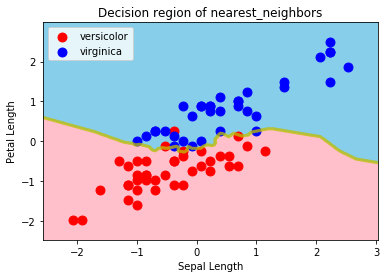

正解率：0.88
適合率：0.89
再現率：0.80
F1値：0.84
--------------------------------


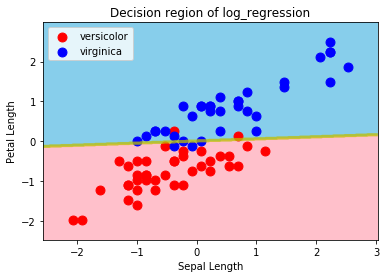

正解率：0.96
適合率：0.91
再現率：1.00
F1値：0.95
--------------------------------


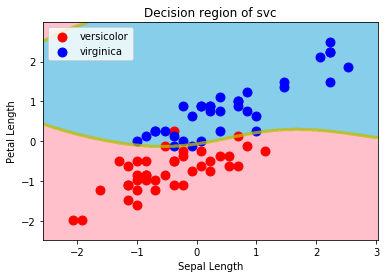

正解率：0.92
適合率：0.90
再現率：0.90
F1値：0.90
--------------------------------


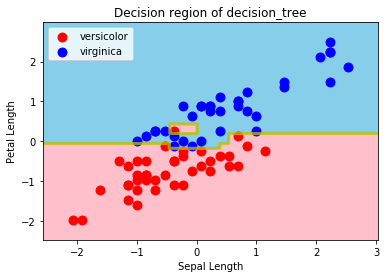

正解率：0.92
適合率：0.90
再現率：0.90
F1値：0.90
--------------------------------


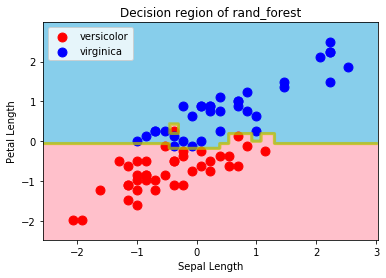

正解率：0.88
適合率：0.89
再現率：0.80
F1値：0.84
--------------------------------


In [41]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

neigh = KNeighborsClassifier()
logreg = LogisticRegression()
svc = SVC()
tree = DecisionTreeClassifier()
forest = RandomForestClassifier()

models = [neigh, logreg, svc, tree, forest]
labels = ['nearest_neighbors', 'log_regression', 'svc', 'decision_tree', 'rand_forest']

for model, label in zip(models, labels):
    model.fit(X_train_std, y_train)
    y_pred = model.predict(X_test_std)

    decision_region(X_train_std, y_train, model, title="Decision region of {}".format(label),
                    xlabel='Sepal Length', ylabel='Petal Length')
    
    print("正解率：{:.2f}".format(accuracy_score(y_test, y_pred)))
    print("適合率：{:.2f}".format(precision_score(y_test, y_pred)))
    print("再現率：{:.2f}".format(recall_score(y_test, y_pred)))
    print("F1値：{:.2f}".format(f1_score(y_test, y_pred)))
    print("--------------------------------")


In [42]:
# 指標値をまとめた表を出力する関数を作成
def model_scores(models, labels):
    
    report = pd.DataFrame(columns=["accuracy", "precision", "recall", "f1"])
    
    for model, label in zip(models, labels):
        model.fit(X_train_std, y_train)
        y_pred = model.predict(X_test_std)

        report.loc[label] = [accuracy_score(y_test, y_pred),
                             precision_score(y_test, y_pred),
                             recall_score(y_test, y_pred),
                             f1_score(y_test, y_pred)]
    
    report
    return report

# 指標をまとめて表示
model_scores(models=[neigh, logreg, svc, tree, forest],
             labels=['nearest_neighbors', 'log_regression', 'svc', 'decision_tree', 'rand_forest'])

,accuracy,precision,recall,f1
nearest_neighbors,0.88,0.888889,0.8,0.842105
log_regression,0.96,0.909091,1.0,0.952381
svc,0.92,0.900000,0.9,0.900000
decision_tree,0.92,0.900000,0.9,0.900000
rand_forest,0.88,0.888889,0.8,0.842105


>各指標で最も良い結果を出したモデルは下記の通り：
>- 正解率 → LogisticRegression
>- 適合率 → DecisionTree
>- 再現率 → LogisticRegression
>- F1値 → LogisticRegression<br>
>
>ただし、いずれの手法も高い指標値を示しており、学習・推定を行うたびに結果は変わる。

>決定領域については手法によって大きく異なっており、LogisticRegressionは線形関数、NearestNeighborは多項式関数による分類となっている。SVCは領域を囲った分類を行い、DecisionTreeやRandomForestは各サンプル毎に分類を行なっていることが分かる。このような分類法の違いより、外れ値やデータが重なる領域の扱いに差が顕著となる。例えば、関数的分類はデータの重なり合いの分類に弱く、DecisionTreeやRandomForestは正しく分類を行える。

## 【問題9】（アドバンス課題）標準化の有無の比較
前処理として標準化を行いましたが、これを行わなかった場合どのような結果が得られるでしょうか。各手法に対しての指標値の表と決定領域の図を作成し比較および考察を行ってください。考察には標準化が機械学習の前処理としてどのような意味があるかを絡めてください。

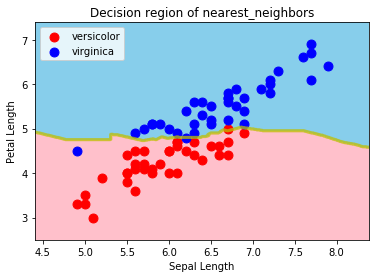

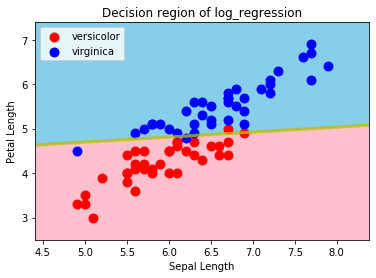

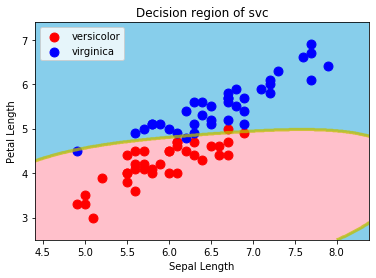

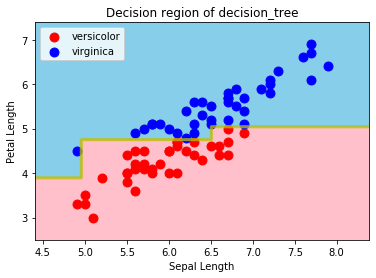

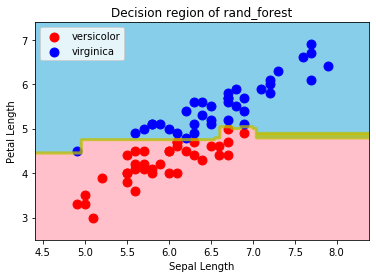

,accuracy,precision,recall,f1
nearest_neighbors,0.92,1.000000,0.846154,0.916667
log_regression,0.88,0.916667,0.846154,0.880000
svc,0.84,0.909091,0.769231,0.833333
decision_tree,0.88,1.000000,0.769231,0.869565
rand_forest,0.88,1.000000,0.769231,0.869565


In [44]:
# DataFrameをndarrayに変換
X_samp = np.array(iris_sample.iloc[:, :-1])
y_samp = np.array(iris_sample.iloc[:, -1])

# データ分割
Xsamp_train, Xsamp_test, ysamp_train, ysamp_test = train_test_split(X_samp, y_samp, test_size=0.25)

# 標準化無し

# 学習、推定、評価
neigh_ns = KNeighborsClassifier()
logreg_ns = LogisticRegression()
svc_ns = SVC()
tree_ns = DecisionTreeClassifier()
forest_ns = RandomForestClassifier()

report = pd.DataFrame(columns=["accuracy", "precision", "recall", "f1"])

models = [neigh_ns, logreg_ns, svc_ns, tree_ns, forest_ns]
labels = ['nearest_neighbors', 'log_regression', 'svc', 'decision_tree', 'rand_forest']
target_names=['versicolor', 'virginica']

for model, label in zip(models, labels):
    model.fit(Xsamp_train, ysamp_train)
    y_pred = model.predict(Xsamp_test)
    
    decision_region(Xsamp_train, ysamp_train, model, title="Decision region of {}".format(label),
                    xlabel='Sepal Length', ylabel='Petal Length', target_names=target_names)
    
    report.loc[label] = [accuracy_score(ysamp_test, y_pred),
                         precision_score(ysamp_test, y_pred),
                         recall_score(ysamp_test, y_pred),
                         f1_score(ysamp_test, y_pred)]

report

>標準化の有無は予測結果に影響しており、未標準化のデータ予測は標準化を行なった場合より予測結果が低い。しかし、有意と思われる予測結果の差では無い。調査したら分かるが、分類予測においてデータの標準化は非常に重要であり（特にlogistic regressionなど関数式分類法）その有無は大きく予測結果を左右するはず。そのため、今回標準化の有無があまり予測を影響しなかった結果はより検証が必要と考える。

## 【問題10】（アドバンス課題）全ての目的変数を使用して精度が高い手法
ここまではアヤメの種類を減らし2値分類を行ってきましたが、3種類全てを使った多値分類を行います。学習と推定、評価を行って、最も精度の高い手法を探してください。<br>

<br>

**《多値になることでの変更点》**<br>
<br>
指標値Precision（適合率）、Recall（再現率）、F値はライブラリのパラメータをデフォルトから変更する必要があります。マイクロ平均やマクロ平均という考え方を使います。<br>

<br>

ロジスティック回帰やSVMは2値分類を基本とした手法で、多値分類には工夫が必要ですが、scikit-learnでは自動的に判断して処理が行われるため変更は必要ありません。

In [46]:
# DataFrameから使用する特徴量とサンプルを抽出
iris_data_mc = iris_df.loc[:,['sepal_length', 'petal_length', 'Species']]

iris_data_mc

,sepal_length,petal_length,Species
0,5.1,1.4,0
1,4.9,1.4,0
2,4.7,1.3,0
3,4.6,1.5,0
4,5.0,1.4,0
...,...,...,...
145,6.7,5.2,2
146,6.3,5.0,2
147,6.5,5.2,2
148,6.2,5.4,2


In [47]:
# DataFrameをndarrayに変換
X_mc = np.array(iris_data_mc.iloc[:, :-1])
y_mc = np.array(iris_data_mc.iloc[:, -1])

# データ分割
X_mc_train, X_mc_test, y_mc_train, y_mc_test = train_test_split(X_mc, y_mc, test_size=0.25)

# 標準化
scaler = StandardScaler()

X_mc_train_std = scaler.fit_transform(X_mc_train)
X_mc_test_std = scaler.transform(X_mc_test)

PREDICTION BY nearest_neighbors


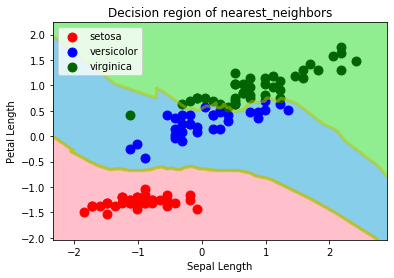

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        12
  versicolor       0.93      0.88      0.90        16
   virginica       0.82      0.90      0.86        10

    accuracy                           0.92        38
   macro avg       0.92      0.92      0.92        38
weighted avg       0.92      0.92      0.92        38

---------------------------------
PREDICTION BY log_regression


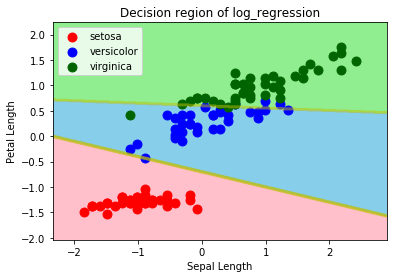

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        12
  versicolor       0.93      0.88      0.90        16
   virginica       0.82      0.90      0.86        10

    accuracy                           0.92        38
   macro avg       0.92      0.92      0.92        38
weighted avg       0.92      0.92      0.92        38

---------------------------------
PREDICTION BY svc


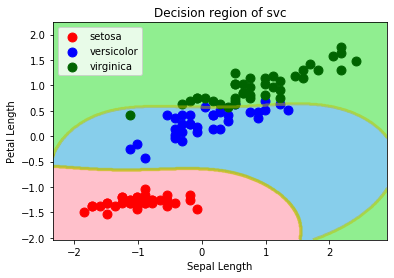

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        12
  versicolor       1.00      0.94      0.97        16
   virginica       0.91      1.00      0.95        10

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38

---------------------------------
PREDICTION BY decision_tree


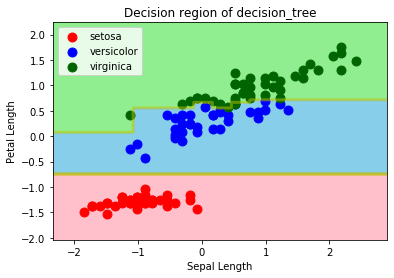

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        12
  versicolor       1.00      0.94      0.97        16
   virginica       0.91      1.00      0.95        10

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38

---------------------------------
PREDICTION BY rand_forest


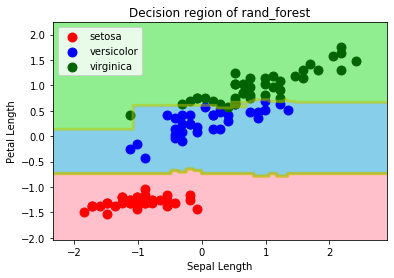

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        12
  versicolor       0.94      0.94      0.94        16
   virginica       0.90      0.90      0.90        10

    accuracy                           0.95        38
   macro avg       0.95      0.95      0.95        38
weighted avg       0.95      0.95      0.95        38

---------------------------------


In [48]:
# 学習、推定、評価
neigh = KNeighborsClassifier()
logreg = LogisticRegression()
svc = SVC()
tree = DecisionTreeClassifier()
forest = RandomForestClassifier()

report = pd.DataFrame(columns=["accuracy", "precision", "recall", "f1"])

models = [neigh, logreg, svc, tree, forest]
labels = ['nearest_neighbors', 'log_regression', 'svc', 'decision_tree', 'rand_forest']
target_names=['setosa', 'versicolor', 'virginica']

for model, label in zip(models, labels):
    model.fit(X_mc_train_std, y_mc_train)
    y_pred = model.predict(X_mc_test_std)

    print("PREDICTION BY {}".format(label))
    
    decision_region(X_mc_train_std, y_mc_train, model, title="Decision region of {}".format(label),
                    xlabel='Sepal Length', ylabel='Petal Length', target_names=target_names)
    
    print(classification_report(y_mc_test, y_pred, target_names=target_names))
    print("---------------------------------")


>多値分類ではSVCとDecisionTreeが最も高い正解率を示した。検証用データの要素数に大きな偏りが無いため（12:16:10）、各手法の正解率は有意な結果と考えられる。